# Task 1-Predict the percentage of an student based on the no. of study hours.

**Linear Regression with Python Scikit Learn**

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

**Simple Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Dataset link- http://bit.ly/w-data

# Author- Ela Shresth




................................................................................................................................

# Importing the necessary libraries

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


# Understanding Data

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
# displaying all the features of the data
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.count()

Hours     25
Scores    25
dtype: int64

In [8]:
df.shape

(25, 2)

In [9]:
#Show statistics on the current data 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df.isnull().any()

Hours     False
Scores    False
dtype: bool

**There is no missing value present in the dataset**

# Data Visualization

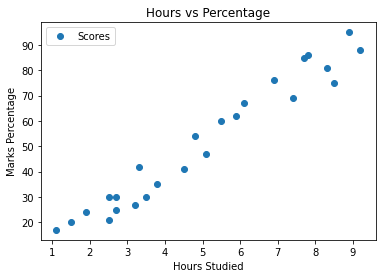

In [11]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Marks Percentage')  
plt.show()

**From the above scatter plot there seems to be correlation between the 'Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

In [12]:
# Assigning values to variables x and y from the data.
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

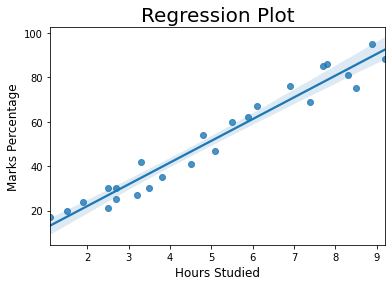

In [13]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [14]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


**It is confirmed that the variables are positively correlated.**

# Applying Linear Regression Model

**1) Splitting the Data**

In [15]:
# Splitting the dataset into train and test dataset.
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

**2)Fitting the Training data into the Model**

In [16]:
# Fitting the training data into the Linear Regression Model.
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
print("Model trained")

Model trained


In [17]:
# Training and Testing data - In Hours
print(x_train)
print(x_test) 

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Predicting the Percentage

In [18]:
# Predicting the percentage of marks.
y_pred = regressor.predict(x_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted %': [k for k in y_pred]})
prediction

,Hours,Predicted %
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


# Comparison between the Predicted Percentage and the Actual Percentage.

In [19]:
# Comparing Actual vs Predicted Percentage.
data = pd.DataFrame({'Actual %': y_test, 'Predicted %': y_pred})  
data

,Actual %,Predicted %
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Graphically Comparing the Predicted Percentage and the Actual Percentage.

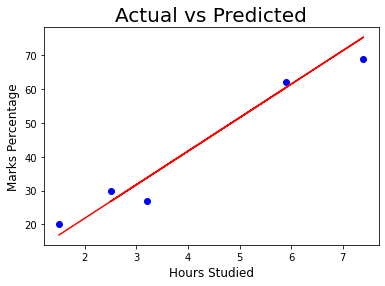

In [20]:
# Visually Comparing the Predicted % with the Actual %.
plt.scatter(x=x_test, y=y_test, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Model Evaluation

In [21]:
# Calculating the accuracy of the model.
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [22]:
hours = [[9.25]]
answer = regressor.predict(hours)
print("Predicted Score = {}".format(answer[0]))

Predicted Score = 93.69173248737535


**According to the Linear Regression model if a student studies for 9.25 hours a day he/she is likely to score 93.692 %.**